In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import spacy
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics._classification import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\NLP projects\\LLM_Project\\Email classification\\spam.csv",encoding='latin1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.drop(['Unnamed: 2' ,'Unnamed: 3','Unnamed: 4'],axis='columns',inplace=True)

In [6]:
df.rename(columns={'v1':'Target',
    'v2': 'Email'}, inplace=True)

In [7]:
df

,Target,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.isnull().sum()

Target    0
Email     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5572 non-null   object
 1   Email   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.describe()

,Target,Email
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
df['label_num'] = df['Target'].apply(lambda x:0 if x =='ham' else 1)

In [12]:
df

,Target,Email,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [13]:
df['label_num'].value_counts()

label_num
0    4825
1     747
Name: count, dtype: int64

In [14]:
class_0, class_1 = df.label_num.value_counts()

In [15]:
df_class_0 = df[df['label_num'] == 0]
df_class_1 = df[df['label_num'] == 1]

In [16]:
df_class_0.shape,df_class_1.shape

((4825, 3), (747, 3))

In [17]:
df_class_0_under = df_class_0.sample(class_1)

In [18]:
df_class_0_under

,Target,Email,label_num
1646,ham,Thts wat Wright Brother did to fly..,0
4356,ham,"HELLOGORGEOUS, HOWS U? MY FONE WAS ON CHARGE L...",0
790,ham,This is hoping you enjoyed your game yesterday...,0
4105,ham,K then 2marrow are you coming to class.,0
3375,ham,"Good afternon, my love. How are today? I hope ...",0
...,...,...,...
3964,ham,Love you aathi..love u lot..,0
694,ham,Ah poop. Looks like ill prob have to send in m...,0
1724,ham,There bold 2 &lt;#&gt; . Is that yours,0
4451,ham,I've told you everything will stop. Just dont ...,0


In [19]:
df_class_1

,Target,Email,label_num
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,1
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,1
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1


In [20]:
df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)

In [21]:
df_class_0_under.label_num.value_counts()

label_num
0    747
Name: count, dtype: int64

In [22]:
df_test_under.label_num.value_counts()

label_num
0    747
1    747
Name: count, dtype: int64

In [23]:
df_test_under

,Target,Email,label_num
1646,ham,Thts wat Wright Brother did to fly..,0
4356,ham,"HELLOGORGEOUS, HOWS U? MY FONE WAS ON CHARGE L...",0
790,ham,This is hoping you enjoyed your game yesterday...,0
4105,ham,K then 2marrow are you coming to class.,0
3375,ham,"Good afternon, my love. How are today? I hope ...",0
...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,1
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,1
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1


In [24]:
import gensim.downloader as api
info = api.info()
for model_name in info['models'].keys():
    print(model_name)

fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis


In [25]:
nlp = spacy.load('en_core_web_lg')

In [26]:
def preprocessing(text):
    doc = nlp(text)
    filtered_token = [token.text for token in doc if not token.is_stop and not token.is_punct]
    join_text = ' '.join(filtered_token).strip()
    lower_text = join_text.lower()
    return re.sub(r'[^A-Za-z]+',' ',lower_text)

In [27]:
text = preprocessing(' Top Trump 45 Surrogate BRUTALLY Stabs Him In The Back: ‘He’s Pathetic’ (VIDEO) It s looking as though Republican presidential candidate 50 Donald Trump is losing support even from within his own ranks. You know things are getting bad when even your top surrogates start turning against you, which is exactly what just happened on Fox News when Newt Gingrich called Trump  pathetic. Gingrich knows that Trump needs to keep his focus on Hillary Clinton if he even remotely wants to have a chance at defeating her. However, Trump has hurt feelings because many Republicans don t support his sexual assault against women have turned against him, including House Speaker Paul Ryan (R-WI). So, that has made Trump lash out as his own party.Gingrich said on Fox News: Look, first of all, let me just say about Trump, who I admire and I ve tried to help as much as I can. There s a big Trump and a little Trump. The little Trump is frankly pathetic. I mean, he s mad over not getting a phone call? Trump s referring to the fact that Paul Ryan didn t call to congratulate him after the debate. Probably because he didn t win despite what Trump s ego tells him.Gingrich also added: Donald Trump has one opponent. Her name is Hillary Clinton. Her name is not Paul Ryan. It s not anybody else. Trump doesn t seem to realize that the person he should be mad at is himself because he truly is his own worst enemy. This will ultimately lead to his defeat and he will have no one to blame but himself.Watch here via Politico:Featured Photo by Joe Raedle/Getty Images')

In [28]:
text

'trump surrogate brutally stabs pathetic video s looking republican presidential candidate donald trump losing support ranks know things getting bad surrogates start turning exactly happened fox news newt gingrich called trump pathetic gingrich knows trump needs focus hillary clinton remotely wants chance defeating trump hurt feelings republicans don t support sexual assault women turned including house speaker paul ryan r wi trump lash party gingrich said fox news look let trump admire ve tried help s big trump little trump little trump frankly pathetic mean s mad getting phone trump s referring fact paul ryan didn t congratulate debate probably didn t win despite trump s ego tells gingrich added donald trump opponent hillary clinton paul ryan s anybody trump doesn t realize person mad truly worst enemy ultimately lead defeat blame watch politico featured photo joe raedle getty images'

In [29]:
df_test_under['filtered_text'] = df_test_under['Email'].apply(preprocessing)

In [30]:
df_test_under

,Target,Email,label_num,filtered_text
1646,ham,Thts wat Wright Brother did to fly..,0,thts wat wright brother fly
4356,ham,"HELLOGORGEOUS, HOWS U? MY FONE WAS ON CHARGE L...",0,hellogorgeous hows u fone charge lst nitw wen ...
790,ham,This is hoping you enjoyed your game yesterday...,0,hoping enjoyed game yesterday sorry touch pls ...
4105,ham,K then 2marrow are you coming to class.,0,k marrow coming class
3375,ham,"Good afternon, my love. How are today? I hope ...",0,good afternon love today hope good maybe inter...
...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,1,want explicit sex secs ring costs p min gsex p...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,asked mobile chatlines inclu free mins india c...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,1,contract mobile mnths latest motorola nokia et...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1,reminder o pounds free credit details great of...


In [31]:
vectorizer = TfidfVectorizer(max_features=5000)

In [44]:
vector = vectorizer.fit_transform(df_test_under['filtered_text'])

In [45]:
df_test_under['vector'] =   vector.toarray().tolist()

In [52]:
df_test_under

,Target,Email,label_num,filtered_text,vector
1646,ham,Thts wat Wright Brother did to fly..,0,thts wat wright brother fly,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4356,ham,"HELLOGORGEOUS, HOWS U? MY FONE WAS ON CHARGE L...",0,hellogorgeous hows u fone charge lst nitw wen ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
790,ham,This is hoping you enjoyed your game yesterday...,0,hoping enjoyed game yesterday sorry touch pls ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.2993015986175774, ..."
4105,ham,K then 2marrow are you coming to class.,0,k marrow coming class,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3375,ham,"Good afternon, my love. How are today? I hope ...",0,good afternon love today hope good maybe inter...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,1,want explicit sex secs ring costs p min gsex p...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,asked mobile chatlines inclu free mins india c...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,1,contract mobile mnths latest motorola nokia et...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1,reminder o pounds free credit details great of...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [53]:
x_train,x_test,y_train,y_test = train_test_split(df_test_under.vector.values,df_test_under.label_num,test_size=0.2,random_state=2022,stratify=df_test_under.label_num)

In [54]:
x_train.shape

(1195,)

In [55]:
x_test.shape

(299,)

In [56]:
x_train.ndim

1

In [57]:
x_train

array([list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [58]:
y_train

553     0
4818    0
3826    1
4392    1
1751    0
       ..
4967    0
4325    0
4705    0
5102    1
3618    1
Name: label_num, Length: 1195, dtype: int64

In [59]:
x_train_2d = np.stack(x_train)
x_test_2d = np.stack(x_test)

In [60]:
x_train_2d.shape

(1195, 3508)

In [61]:
x_test_2d.shape

(299, 3508)

In [62]:
clf = GradientBoostingClassifier()
clf.fit(x_train_2d,y_train)

GradientBoostingClassifier()

In [63]:
y_pred = clf.predict(x_test_2d)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       149
           1       0.93      0.87      0.90       150

    accuracy                           0.90       299
   macro avg       0.90      0.90      0.90       299
weighted avg       0.90      0.90      0.90       299



In [65]:
logi = LogisticRegression()
logi.fit(x_train_2d,y_train)
y_pred = logi.predict(x_test_2d)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.89      0.96      0.93       149
           1       0.96      0.89      0.92       150

    accuracy                           0.92       299
   macro avg       0.93      0.92      0.92       299
weighted avg       0.93      0.92      0.92       299



In [70]:
random = RandomForestClassifier(n_estimators=500,random_state=2022)
random.fit(x_train_2d,y_train)
y_pred = random.predict(x_test_2d)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       149
           1       0.97      0.92      0.94       150

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



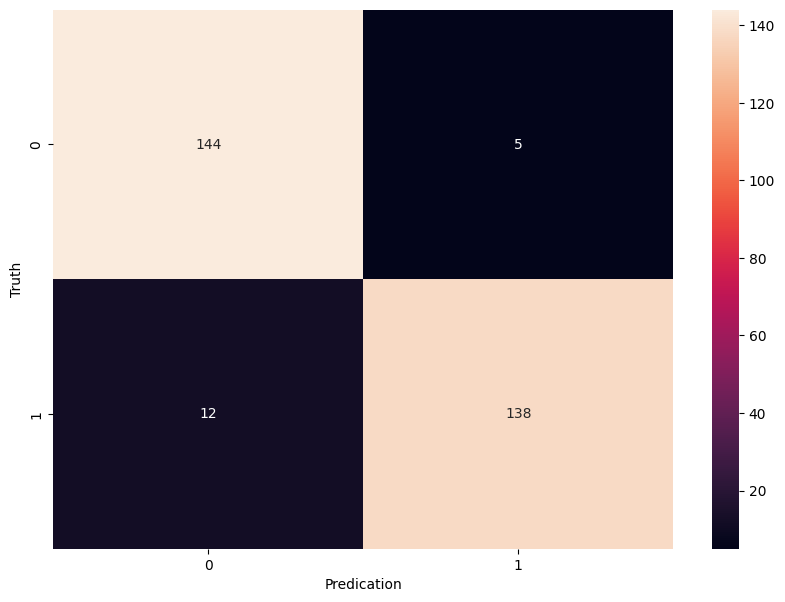

In [71]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predication')
plt.ylabel('Truth')
plt.show()

In [95]:
test_email = ["You wana be go outside",
             "you win 10000 money  click this link"]
test_email_vector = vectorizer.transform(test_email)
cleaning_area = [preprocessing(n) for n in test_email]
convert_into_vector  = vectorizer.transform(cleaning_area)
random.predict(convert_into_vector)

array([0, 1], dtype=int64)

In [96]:
import joblib

In [97]:
joblib.dump(random,'D:/NLP projects/LLM_Project/Email classification/model.pkl')

['D:/NLP projects/LLM_Project/Email classification/model.pkl']

In [98]:
joblib.dump(vectorizer,'D:/NLP projects/LLM_Project/Email classification/vector.pkl')

['D:/NLP projects/LLM_Project/Email classification/vector.pkl']